# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Litesh Samji

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [15]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

641

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [16]:
#create url for query with imperial units and city at the end
#url from https://openweathermap.org/appid
url = "http://api.openweathermap.org/data/2.5/weather?id=524901"
unit = "metric"
query_url = f"{url}&appid={weather_api_key}&units={unit}&q="

# Lists for results
lat = []
lon = []
foundCities = []
temp = []
humidity = []
cloudiness = []
windSpeed = []
date = []
country = []

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        windSpeed.append(response["wind"]["speed"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        foundCities.append(city)
        print(f"City processed: {city}")
    except:
        print(f"City NOT found: {city}")
print("Data Retrieval Complete")

City processed: naze
City NOT found: taolanaro
City processed: saint george
City NOT found: barentsburg
City processed: gazojak
City processed: souillac
City processed: colac
City NOT found: illoqqortoormiut
City processed: provost
City processed: busselton
City processed: biograd na moru
City processed: yulara
City processed: longyearbyen
City processed: vaini
City processed: kodiak
City processed: kapaa
City processed: atuona
City processed: coffs harbour
City processed: san carlos de bariloche
City processed: cape town
City processed: upernavik
City processed: coxim
City processed: torbay
City processed: esperance
City processed: ribeira grande
City processed: mushie
City processed: soe
City processed: chapadinha
City processed: east london
City processed: dingle
City processed: mataura
City processed: sao filipe
City processed: thompson
City processed: kamiiso
City processed: yurty
City processed: puerto ayora
City processed: kutum
City processed: nuristan
City processed: talnakh
C

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [41]:
city_weather_df = pd.DataFrame({"City": foundCities,
                           "Country": country,
                           "Temperature": temp,
                           "Humidity": humidity,
                           "Cloudiness": cloudiness,
                           "Windspeed":windSpeed,
                           "Latitude": lat,
                           "Longitude": lon,
                           "Date": date
                          })

#Save to file
city_weather_df.to_csv("../output/cities.csv", index=True, index_label="City", header=True)

#Print dataframe
city_weather_df

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude,Date
0,naze,JP,25.51,84,89,1.58,28.3667,129.4833,1623661079
1,saint george,US,28.33,15,1,0.89,37.1041,-113.5841,1623660791
2,gazojak,TM,34.10,6,0,7.06,41.1875,61.4036,1623661081
3,souillac,MU,26.21,69,40,7.20,-20.5167,57.5167,1623661082
4,colac,AU,11.35,80,97,1.48,-38.3333,143.5833,1623660940
...,...,...,...,...,...,...,...,...,...
572,hella,NO,10.08,76,75,3.09,67.2000,14.4333,1623661521
573,chkalovskoye,RU,24.05,82,6,2.35,44.8392,133.0436,1623661521
574,los llanos de aridane,ES,19.86,84,20,7.20,28.6585,-17.9182,1623661522
575,wamba,NG,27.76,69,96,1.47,8.9333,8.6000,1623661523


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [42]:
humidity_over_100 = city_weather_df[(city_weather_df['Humidity'] > 100)]
humidity_over_100

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude,Date


In [47]:
#  Get the indices of cities that have humidity over 100%.
 Humidity100Index = humidity_over_100.index

In [46]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

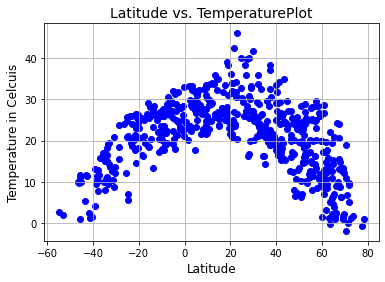

In [61]:
plt.scatter(lat, temp, marker="o", facecolors="blue")

# --- add labels, title, limits & grid ---
plt.title("Latitude vs. TemperaturePlot", fontsize=14)
plt.ylabel("Temperature in Celcuis", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# Save and show scatter plot
plt.savefig("../Images/latitude-vs-temp.png")
plt.show()


## Latitude vs. Humidity Plot

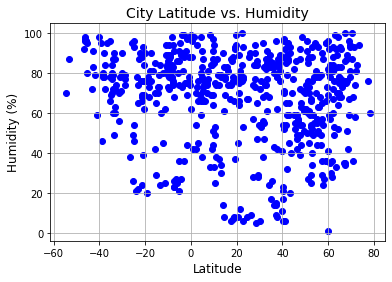

In [63]:
plt.scatter(lat, humidity, marker="o", facecolors="blue")

# --- add labels, title, limits & grid ---
plt.title("City Latitude vs. Humidity", fontsize=14)
plt.ylabel("Humidity (%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- display and save the plot ---
plt.savefig("../Images/latitude-vs-humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

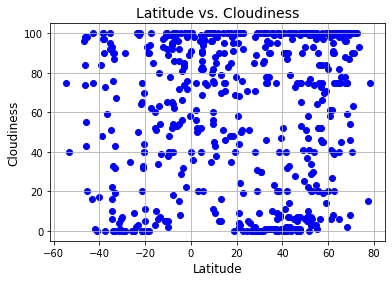

In [65]:
plt.scatter(lat, cloudiness, marker="o", facecolors="blue")

# --- add labels, title, limits & grid ---
plt.title("Latitude vs. Cloudiness", fontsize=14)
plt.ylabel("Cloudiness", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- display and save the plot ---
plt.savefig("../Images/latitude-vs-cloudiness.png")
plt.show()


## Latitude vs. Wind Speed Plot

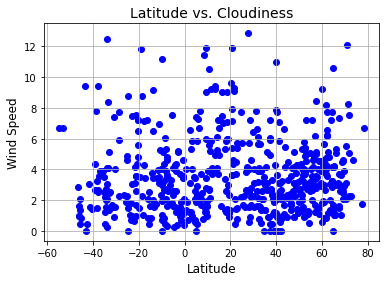

In [66]:
plt.scatter(lat, windSpeed, marker="o", facecolors="blue")

# --- add labels, title, limits & grid ---
plt.title("Latitude vs. Cloudiness", fontsize=14)
plt.ylabel("Wind Speed", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- display and save the plot ---
plt.savefig("../Images/latitude-vs-cloudiness.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


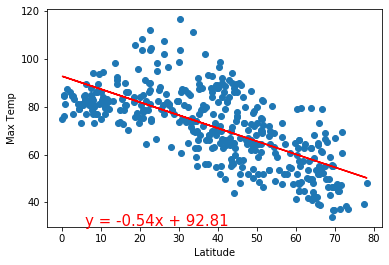

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


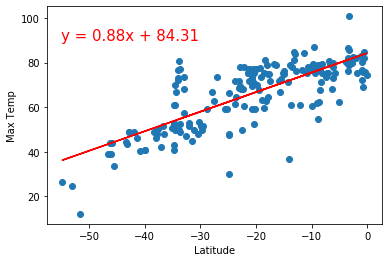

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


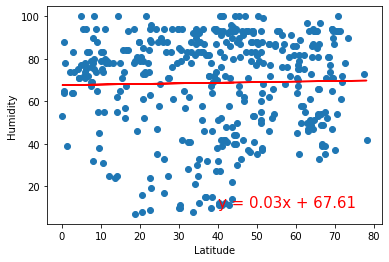

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


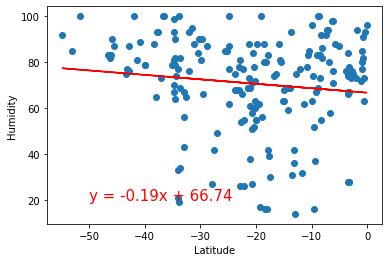

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


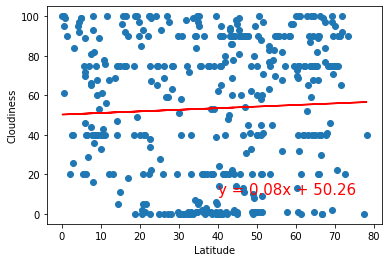

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


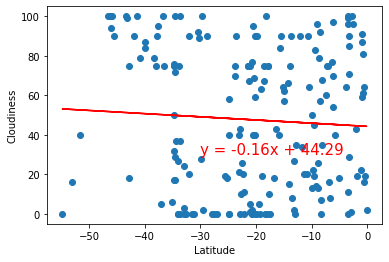

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


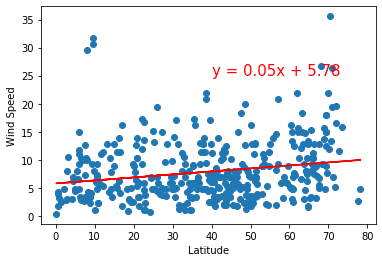

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


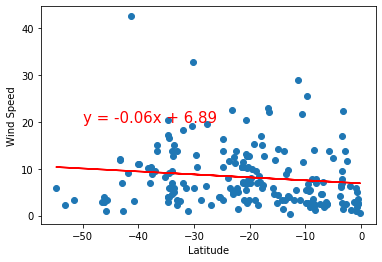